In [102]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime as dt
from scipy.optimize import minimize
import matplotlib.ticker as mtick

In [80]:
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JPM', 'BRK-B', 'JNJ', 'V', 
    'NVDA', 'PG', 'UNH', 'HD', 'DIS', 'PYPL', 'MA', 'NFLX', 'INTC', 'VZ',
    'KO', 'PEP', 'MRK', 'BA', 'WMT', 'PFE', 'CSCO', 'ABT', 'CMCSA', 'ADBE', 'XOM'
]

In [87]:
data = yf.download(tickers, start="2014-01-01", end="2023-12-31")
# data.to_csv("data_2014_2023.csv")
# data = pd.read_csv("data_2014_2023.csv")
data

[*********************100%%**********************]  30 of 30 completed


Price        Adj Close                                                  \
Ticker            AAPL         ABT        ADBE        AMZN          BA   
Date                                                                     
2014-01-02   17.253256   31.049797   59.290001   19.898500  116.807945   
2014-01-03   16.874271   31.382805   59.160000   19.822001  117.619919   
2014-01-06   16.966288   31.797014   58.119999   19.681499  118.295067   
2014-01-07   16.844961   31.553345   58.970001   19.901501  120.089897   
2014-01-08   16.951628   31.837612   58.900002   20.096001  120.354851   
...                ...         ...         ...         ...         ...   
2023-12-22  192.868149  107.400558  598.750000  153.419998  260.440002   
2023-12-26  192.320221  107.597572  598.260010  153.410004  262.790009   
2023-12-27  192.419830  108.149193  596.080017  153.339996  262.100006   
2023-12-28  192.848206  108.750084  595.520020  153.380005  260.350006   
2023-12-29  191.802170  108.425011  596.599976  151.940002  260.660004   

Price                                                                ...  \
Ticker           BRK-B      CMCSA       CSCO        DIS       GOOGL  ...   
Date                                                                 ...   
2014-01-02  117.500000  20.608992  15.829066  69.643196   27.823923  ...   
2014-01-03  117.570000  20.456778  15.814677  69.497093   27.620953  ...   
2014-01-06  116.279999  20.436743  15.836265  69.232300   27.928907  ...   
2014-01-07  116.190002  21.161766  16.052113  69.707108   28.467329  ...   
2014-01-08  115.339996  21.129723  16.037727  68.684433   28.526569  ...   
...                ...        ...        ...        ...         ...  ...   
2023-12-22  356.470001  43.036057  48.881683  90.602005  141.327805  ...   
2023-12-26  356.829987  42.967590  49.067101  90.532326  141.357773  ...   
2023-12-27  356.950012  43.026279  49.223244  89.964943  140.209076  ...   
2023-12-28  357.570007  43.153423  49.262276  89.984856  140.069244  ...   
2023-12-29  356.660004  42.889339  49.301311  89.875359  139.529861  ...   

Price        Volume                                                      \
Ticker          PEP       PFE        PG        PYPL       TSLA      UNH   
Date                                                                      
2014-01-02  3275900  18366266   6981700         NaN   92826000  3067000   
2014-01-03  3287200  15847312   6925600         NaN   70425000  3206400   
2014-01-06  3888400  25255421   7208200         NaN   80416500  3424500   
2014-01-07  6332400  23423042   7158200         NaN   75511500  6542500   
2014-01-08  5653300  24161053  13458800         NaN   92448000  6172200   
...             ...       ...       ...         ...        ...      ...   
2023-12-22  3030100  35087200   4412800  13164000.0   93249800  1759500   
2023-12-26  2779200  30119100   3634900   9940600.0   86892400  1390800   
2023-12-27  3502500  35000700   4569400  11112300.0  106494400  1851800   
2023-12-28  2911100  30472900   5023000  11233400.0  113619900  2001000   
2023-12-29  3291500  30342500   5300900  16779000.0  100615300  2080100   

Price                                               
Ticker             V        VZ       WMT       XOM  
Date                                                
2014-01-02  10654000   9270200  20634000  11028100  
2014-01-03   7809600  12022200  14872200   9295600  
2014-01-06   8577600  16054800  21840600  11848500  
2014-01-07   8178000  17594600  15036900  11187000  
2014-01-08   8487200  13110700  17865600  11180400  
...              ...       ...       ...       ...  
2023-12-22   5111500  13157900  19405500  12921800  
2023-12-26   2085100  11856600  11679900  16835100  
2023-12-27   4034700  15267600  19896000  14558800  
2023-12-28   3020500  14931700  16776000  16329300  
2023-12-29   4074600  16205200  21948300  17741400  

[2516 rows x 180 columns]

In [49]:
shares_outstanding = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    info = stock.info
    shares = info.get('sharesOutstanding', None)  # Get shares outstanding
    shares_outstanding[ticker] = shares

print(shares_outstanding)

{'AAPL': 15204100096, 'MSFT': 7433039872, 'GOOGL': 5858999808, 'AMZN': 10495599616, 'TSLA': 3194639872, 'JPM': 2845159936, 'BRK-B': 1325190016, 'JNJ': 2407239936, 'V': 1670439936, 'NVDA': 24598300672, 'PG': 2354050048, 'UNH': 923417984, 'HD': 991614016, 'DIS': 1813590016, 'PYPL': 1022329984, 'MA': 916710976, 'NFLX': 429164992, 'INTC': 4276000000, 'VZ': 4209520128, 'KO': 4309870080, 'PEP': 1373570048, 'MRK': 2534810112, 'BA': 616222976, 'WMT': 8043539968, 'PFE': 5666699776, 'CSCO': 4028809984, 'ABT': 1739900032, 'CMCSA': 3863059968, 'ADBE': 443400000, 'XOM': 4442829824}


In [88]:
topics = {i[0] for i in data.columns}
print(f"The queried data retrieves information about the following topics for the tickers:\n{topics}")

The queried data retrieves information about the following topics for the tickers:
{'Volume', 'Low', 'Close', 'Open', 'Adj Close', 'High'}


In [92]:
topic = "Adj Close"

returns = data[topic].pct_change().apply(lambda x: np.log(x+1)).dropna()
returns_mean = returns.mean()
covariance_matrix = returns.cov()
returns.head()

Ticker,AAPL,ABT,ADBE,AMZN,BA,BRK-B,CMCSA,CSCO,DIS,GOOGL,...,PEP,PFE,PG,PYPL,TSLA,UNH,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-07,-0.002463,0.009405,0.001117,0.001558,0.018543,0.011259,0.006419,0.005130,0.012028,0.008050,...,0.020965,0.014333,0.020648,-0.002455,-0.043250,-0.012024,-0.005151,0.004454,0.017223,0.004111
2015-07-08,-0.025136,-0.019305,-0.007473,-0.016205,-0.008629,-0.011186,-0.013205,-0.013616,-0.016445,-0.015261,...,-0.008229,-0.008336,-0.008973,-0.053855,-0.049432,-0.016035,-0.015465,-0.002573,-0.009942,-0.010920
2015-07-09,-0.020607,-0.001219,0.005983,0.010855,0.006181,0.009813,0.005174,-0.002968,0.003553,0.005431,...,-0.010726,0.012182,-0.004083,-0.005780,0.011543,0.004704,0.004784,-0.006894,-0.003840,-0.004524
2015-07-10,0.026383,0.014932,0.001490,0.020778,0.011696,0.010648,0.018850,0.013656,0.007240,0.020823,...,0.010098,0.014659,0.003589,0.005492,0.004758,0.023273,0.020227,0.015870,0.004661,0.007570
2015-07-13,0.019122,0.000604,0.010492,0.026829,0.014703,0.011810,0.008353,0.018523,0.013732,0.027701,...,0.017327,0.013298,0.011789,0.058503,0.011548,0.002453,0.015950,0.004246,0.010340,0.002429


In [104]:
numero_carteiras = 1000000
tabela_retornos_esperados = np.zeros(numero_carteiras)
tabela_volatilidades_esperadas = np.zeros(numero_carteiras)
tabela_sharpe = np.zeros(numero_carteiras)
tabela_pesos = np.zeros((numero_carteiras, len(tickers)))

for k in range(numero_carteiras):
    
    pesos = np.random.random(len(tickers))
    pesos = pesos/np.sum(pesos)
    tabela_pesos[k, :] = pesos
    
    tabela_retornos_esperados[k] = np.sum(returns_mean * pesos * 252)
    tabela_volatilidades_esperadas[k] = np.sqrt(np.dot(pesos.T, np.dot(covariance_matrix*252, pesos)))
    
    tabela_sharpe[k] = tabela_retornos_esperados[k]/tabela_volatilidades_esperadas[k]

In [105]:
indice_do_sharpe_maximo = tabela_sharpe.argmax()
tabela_pesos[indice_do_sharpe_maximo]

array([0.05415565, 0.00336465, 0.01862809, 0.07278155, 0.00024445,
       0.0166595 , 0.02030575, 0.00742025, 0.00524994, 0.01109566,
       0.00130919, 0.01987879, 0.05643192, 0.06201487, 0.0053911 ,
       0.02663739, 0.04230215, 0.0788142 , 0.06075937, 0.08274055,
       0.06365858, 0.01309065, 0.01099027, 0.00712265, 0.05182624,
       0.04093088, 0.02441494, 0.0221506 , 0.06813184, 0.05149832])

In [106]:
tabela_retornos_esperados_arit = np.exp(tabela_retornos_esperados) - 1

In [107]:
from scipy.optimize import minimize


eixo_y_fronteira_eficiente = np.linspace(
    tabela_retornos_esperados_arit.min(), 
    tabela_retornos_esperados_arit.max(), 50
)

def pegando_retorno(peso_teste):
    peso_teste = np.array(peso_teste)
    retorno = np.sum(returns_mean * peso_teste) * 252
    retorno = np.exp(retorno) - 1

    return retorno

def checando_soma_pesos(peso_teste):

    return np.sum(peso_teste)-1

def pegando_vol(peso_teste):
    peso_teste = np.array(peso_teste)
    vol = np.sqrt(np.dot(peso_teste.T, np.dot(covariance_matrix*252, peso_teste)))
    
    return vol

peso_inicial = [1/len(tickers)] * len(tickers) 
limites = tuple([(0, 1) for ativo in tickers])

eixo_x_fronteira_eficiente = []

for retorno_possivel in eixo_y_fronteira_eficiente:
    
    #vamos pegar a melhor volatilidade para cada retorno possível
    
    restricoes = ({'type':'eq', 'fun':checando_soma_pesos},
            {'type':'eq', 'fun': lambda w: pegando_retorno(w) - retorno_possivel})
    
    result = minimize(pegando_vol,peso_inicial,method='SLSQP', bounds=limites, 
                      constraints=restricoes)
    eixo_x_fronteira_eficiente.append(result['fun'])
    

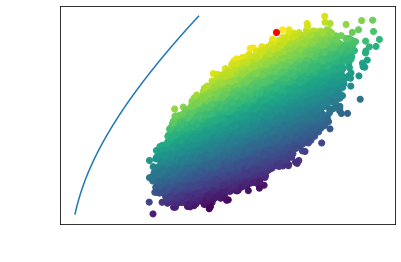

In [108]:
fig, ax = plt.subplots()

ax.scatter(tabela_volatilidades_esperadas, tabela_retornos_esperados_arit, c = tabela_sharpe)
plt.xlabel("Volatilidade esperada")
plt.ylabel("Retorno esperado")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.scatter(tabela_volatilidades_esperadas[indice_do_sharpe_maximo], 
            tabela_retornos_esperados_arit[indice_do_sharpe_maximo], c = "red")
ax.plot(eixo_x_fronteira_eficiente, eixo_y_fronteira_eficiente)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.show()

### Equally Weighted Portfolio

In [42]:
# Calculate the equally weighted portfolio returns
equal_weights = [1/len(tickers)] * len(tickers)
equal_weighted_returns = returns.dot(equal_weights)

# Create a DataFrame to store the equally weighted portfolio returns
equal_weighted_portfolio = pd.DataFrame(equal_weighted_returns, columns=['Equally Weighted Portfolio'])
equal_weighted_portfolio


,Equally Weighted Portfolio
Date,
2015-07-07,0.003088
2015-07-08,-0.014860
2015-07-09,0.001567
2015-07-10,0.012740
2015-07-13,0.014617
...,...
2023-12-22,0.001324
2023-12-26,0.004587
2023-12-27,0.001531


In [76]:
weights_dict = {ticker: 1 for ticker in tickers}

# Convert weights dictionary to a list of weights for calculation
weights = [weights_dict[ticker] for ticker in tickers]

# Calculate the equally weighted portfolio returns
equal_weighted_returns = returns.dot(weights)

# Create a DataFrame to store the equally weighted portfolio returns
equal_weighted_portfolio = pd.DataFrame(equal_weighted_returns, columns=['Equally Weighted Portfolio'])

# Display the first few rows
equal_weighted_portfolio.head()

,Equally Weighted Portfolio
Date,
2015-07-07,0.092637
2015-07-08,-0.445795
2015-07-09,0.047014
2015-07-10,0.382206
2015-07-13,0.438509


###  Value-Weighted Portfolio
A value-weighted portfolio assigns weights based on the market capitalization of each company. Here, we'll use the stock prices as a proxy for market capitalization. For a more accurate calculation, you would use the actual market cap data.

Calculate Market Capitalization:

Download the number of shares outstanding for each company.
Multiply by the price to get market capitalization.
Assign Weights Based on Market Cap:

For simplicity, we’ll assume the prices at the start date as proxies for market cap weights.

In [63]:
# Use the prices on the last available date as proxies for market cap
initial_prices = data[topic].iloc[-1]

# Calculate weights as a proportion of the total market cap
market_caps = {ticker:initial_prices[ticker] * shares_outstanding[ticker] for ticker in tickers}
total_market_cap = sum(market_caps.values())
value_weights = {ticker:market_caps[ticker] / total_market_cap for ticker in tickers}

# Calculate the value-weighted portfolio returns
value_weighted_returns = returns.dot(value_weights)

# Create a DataFrame to store the value-weighted portfolio returns
value_weighted_portfolio = pd.DataFrame(value_weighted_returns, columns=['Value Weighted Portfolio'])

IndexError: tuple index out of range

In [65]:

sorted_keys_desc = sorted(value_weights, key=lambda k: value_weights[k], reverse=True)
print(sorted_keys_desc)

['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'TSLA', 'UNH', 'JPM', 'BRK-B', 'XOM', 'V', 'WMT', 'MA', 'JNJ', 'PG', 'HD', 'MRK', 'ADBE', 'KO', 'PEP', 'INTC', 'NFLX', 'CSCO', 'ABT', 'CMCSA', 'DIS', 'PFE', 'BA', 'VZ', 'PYPL']
